* **Japan (Tokyo)**
    * [3/25 (171)](https://www.letsgojp.com/archives/425718)
    * [3/24 (154)](https://inews.hket.com/article/2569662)
* [**Taiwan**](https://www.twreporter.org/a/2019-ncov-epidemic)
    * 3/27: Total 267 cases, 15 new confirmed cases (All imported)
    * 3/26: Total 252 cases, 17 new confirmed cases (15 imported and 2 domestic)
    * 3/25: Total 235 cases, 19 new confirmed cases (All imported)
    * 3/24: Total 216 cases, 21 new confirmed cases (20 imported and 1 domestic)
    * 3/23: Total 195 cases, 26 new confirmed cases (25 imported and 1 domestic)
    * 3/22: Total 169 cases, 16 new confirmed cases (13 imported and 1 domestic)
    * 3/21: Total 153 cases, 18 new confirmed cases (All imported)
    * 3/20: Total 135 cases, 27 new confirmed cases (24 imported and 3 domestic)
    * 3/19: Total 108 cases, 8 new confirmed cases (7 imported and 1 domestic)
    * 3/18: Total 100 cases, 23 new confirmed cases (21 imported and 2 domestic)


In [1]:
from datetime import datetime, timedelta

begin_date = datetime.strptime('2020/03/18', '%Y/%m/%d')
taiwan_cc = [
    (100, 23, 21, 2),  # (Total, new, imported, domestic)
    (108,  8,  7, 1),
    (135, 27, 24, 3),
    (153, 18, 18, 0),
    (169, 16, 13, 3),
    (195, 26, 25, 1),
    (216, 21, 20, 1),
    (235, 19, 19, 0),
    (252, 17, 15, 2),
    (267, 15, 15, 0),
    (283, 16, 14, 2)
]  # Taiwan confirmed cases

## Trending Line Chart

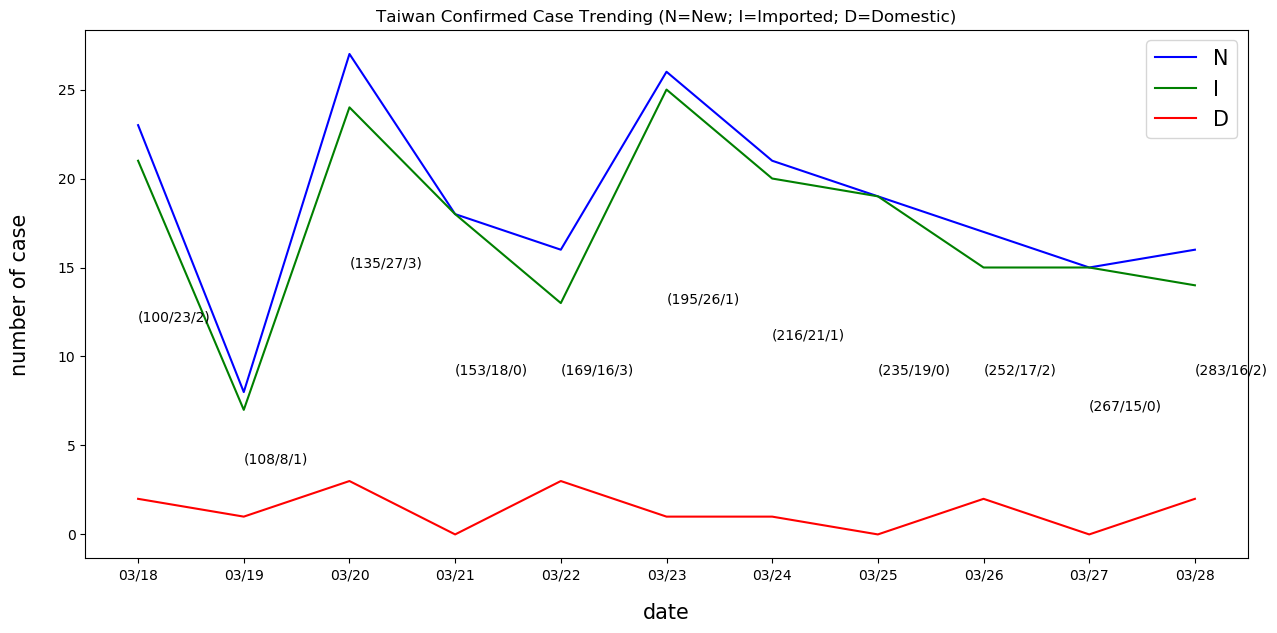

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# 0) Data preparation
dates = []
for i in range(len(taiwan_cc)):
    d = begin_date + timedelta(days=i)
    dates.append(d.strftime('%m/%d'))
    
total_cases = []
new_cases = []
imported_cases = []
domestic_cases = []
for t in taiwan_cc:
    total_cases.append(t[0])
    new_cases.append(t[1])
    imported_cases.append(t[2])
    domestic_cases.append(t[3])
    
# 1) Drawing chart
plt.figure(figsize=(15,7), dpi=100, linewidth=2)
plt.plot(dates, new_cases, color = 'b', label="N")
plt.plot(dates, imported_cases, color = 'g', label="I")
plt.plot(dates, domestic_cases, color = 'r', label="D")
plt.xlabel("date", fontsize=15, labelpad = 15)
plt.ylabel("number of case", fontsize=15, labelpad = 20)
plt.title('Taiwan Confirmed Case Trending (N=New; I=Imported; D=Domestic)')
plt.legend(loc = "best", fontsize=15)

i = 0
for c, d in zip(new_cases, dates):
    tc = total_cases[i]
    dc = domestic_cases[i]
    y = int((c + dc) / 2)
    plt.text(d, y, '({}/{}/{})'.format(total_cases[i], c, dc))
    i+=1
    
plt.show()

## Distribution of confirmed case (Imported/Domestic)

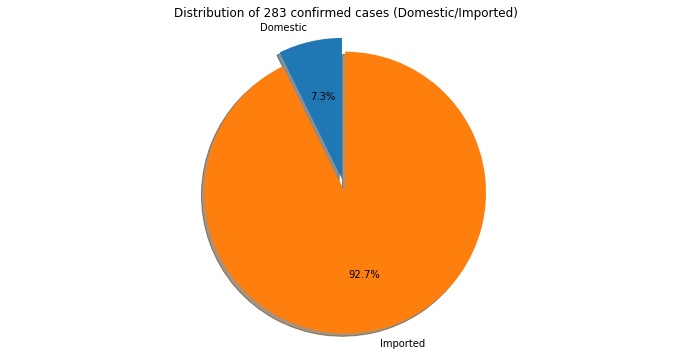

In [3]:
from functools import reduce

plt.rcParams["figure.figsize"] = (12, 6)
labels = ['Domestic', 'Imported']
domestic_number = reduce(lambda v, t: v + t[-1], taiwan_cc, 0)
imported_number = reduce(lambda v, t: v + t[-2], taiwan_cc, 0)

datas = [domestic_number, imported_number]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(datas, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of {:,d} confirmed cases (Domestic/Imported)'.format(taiwan_cc[-1][0]))
plt.show()